<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Climate_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Load data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/city_temperature.csv', low_memory= False)

In [3]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


## 1.2 Dataframe info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


## 1.3 Dataframe dimensions

The data set consists of

In [5]:
print(f'{df.shape[1]} columns and {df.shape[0]} rows.')

8 columns and 2906327 rows.


## 1.4 Missing values per column

In [6]:
pd.DataFrame({'Null values': df.isnull().sum(), 'Percentage (%)': round((df.isnull().sum()/df.shape[0]) * 100, 2)}).transpose()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Null values,0.0,0.0,1450990.00,0.0,0.0,0.0,0.0,0.0
Percentage (%),0.0,0.0,49.93,0.0,0.0,0.0,0.0,0.0


Only the column `state` has missing values. These correspond to almost half (50%) of the column data.

## 1.5 Dataframe descriptive statistics

In [7]:
pd.options.display.float_format = '{:.2f}'.format # to avoid scientific notation
df.describe()

,Month,Day,Year,AvgTemperature
count,2906327.00,2906327.00,2906327.00,2906327.00
mean,6.47,15.72,2006.62,56.00
std,3.46,8.80,23.38,32.12
min,1.00,0.00,200.00,-99.00
25%,3.00,8.00,2001.00,45.80
50%,6.00,16.00,2007.00,62.50
75%,9.00,23.00,2013.00,75.50
max,12.00,31.00,2020.00,110.00


Here you can see some points to analyze more closely:

* The minimum of the column `day` is **ZERO**, certainly incorrectly entered data, which configures an inconsistency.

* And the minimum of the average temperature column, after all -99 °F corresponds to approximately - 73 °C. Despite being a possible temperature value for very cold areas of the planet, it is important to analyze the data with this value.
* In the column `year`, the smallest value that appears is 200.

# 2. Data treatment

## 2.1 Column renaming

As a good practice, columns are renamed in all lowercase characters:

In [8]:
df = df.rename(
    columns= {'Region': 'region', 'Country': 'country', 'State': 'state', 'City': 'city',
              'Month': 'month', 'Day': 'day', 'Year': 'year', 'AvgTemperature': 'avg_temperature'}
)

In [9]:
df.head(2)

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40


In [10]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

## 2.2 Treatment of inconsistent data

Data considered inconsistent, just by analyzing the table of descriptive statistics, are days with zero value, average temperatures of -99 ºF and the minimum value 200 for year. Checking each case:

### 2.2.1 Column `day` data with values ​​equal to zero

In [11]:
day_zero = df.query('day == 0')
day_zero

,region,country,state,city,month,day,year,avg_temperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.00
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.00
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.00
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.00
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.00
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.00
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.00
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.00


In [12]:
f'Number of rows: {day_zero.shape[0]}'

'Number of rows: 8'

In all cases where there is **ZERO** day there is also a temperature of -99 °F.

### 2.2.2 Column `year` with inconsistent values

In [13]:
year_inconsistent = df.query('year < 1995').sample(10)
year_inconsistent

,region,country,state,city,month,day,year,avg_temperature
744180,Europe,Germany,NaN,Hamburg,12,26,201,-99.00
232903,Africa,Tanzania,NaN,Dar Es Salaam,12,5,201,-99.00
754501,Europe,Germany,NaN,Munich,12,30,201,-99.00
111987,Africa,Kenya,NaN,Nairobi,12,14,201,-99.00
743783,Europe,Germany,NaN,Hamburg,12,24,200,-99.00
745324,Europe,Germany,NaN,Hamburg,12,15,201,-99.00
845939,Europe,Norway,NaN,Oslo,12,31,200,-99.00
743395,Europe,Germany,NaN,Hamburg,12,31,200,-99.00
111989,Africa,Kenya,NaN,Nairobi,12,16,201,-99.00
744939,Europe,Germany,NaN,Hamburg,12,25,201,-99.00


Again, in all cases where there is inconsistency in the column `year` data, there is also the average temperature of -99 °F.

In [14]:
year_inconsistent['avg_temperature'].unique()

array([-99.])

### 2.2.3 -99 °F temperature in column `avg_temperature`

In [15]:
df.query('avg_temperature == -99')

,region,country,state,city,month,day,year,avg_temperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.00
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.00
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.00
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.00
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.00
...,...,...,...,...,...,...,...,...
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.00
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.00
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.00
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.00


### 2.2.4 Drop inconsisten values

The condition used to eliminate the data is to remove where the mean temperature is -99 °F. It was seen in 2.2.1 and 2.2.2, respectively, that where the day is zero and the year is also inconsistent there is this temperature.

The data that will be removed corresponds, in percentage, to:

In [16]:
f'{round((df.query("avg_temperature == -99").shape[0]/df.shape[0]) * 100, 2)}%'

'2.74%'

As inconsistent data corresponds to a tiny amount of the entire dataset, these values ​​can be dropped:

In [17]:
df = df.drop(df.query('avg_temperature == -99').index).reset_index(drop= True) # adjust index after dropping the data
df

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90
...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.40
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.60
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.20
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.80


## 2.3 Temperature unit conversion

The unit of temperature in the dataset is the Fahrenheit scale (°F). However, this scale can be converted to the Celsius scale (°C):

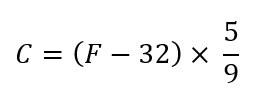

The lambda function is used to convert the data for each row in the dataset:

In [18]:
df['avg_temperature'] = df['avg_temperature'].map(lambda x: (x - 32) * (5/9))

In [19]:
df.sample(10)

,region,country,state,city,month,day,year,avg_temperature
432437,Asia,Pakistan,NaN,Karachi,5,10,1998,31.89
1621603,North America,US,Maryland,Washington DC,11,15,1997,5.06
127208,Africa,Mozambique,NaN,Maputo,7,26,1997,19.22
1221692,South/Central America & Carribean,Brazil,NaN,Brasilia,4,4,2000,22.06
859502,Europe,Spain,NaN,Bilbao,3,22,1997,10.44
1302614,South/Central America & Carribean,Guatemala,NaN,Guatemala City,9,16,2006,20.44
2187630,North America,US,New Mexico,Albuquerque,9,11,1998,23.72
717400,Europe,Hungary,NaN,Budapest,11,7,2005,7.33
1226546,South/Central America & Carribean,Brazil,NaN,Brasilia,8,2,2013,19.72
1622957,North America,US,Maryland,Washington DC,8,5,2001,26.61


## Derivate columns from date columns

In [27]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']], format = '%Y-%m-%d')

In [38]:
df['quarter_of_year'] = df['year'].astype(str) + 'Q' + df['date'].dt.quarter.astype(str)

In [45]:
px.line(x= df.groupby('quarter_of_year')['avg_temperature'].mean().keys(), 
        y= df.groupby('quarter_of_year')['avg_temperature'].mean().values, markers= True)

In [22]:
# df.query('country == "Brazil"')['city'].unique()

In [23]:
# df = df.drop(df.query('day == 0 or avg_temperature == -99').index).reset_index(drop= True) # adjust index 
# df